In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import random
import json
import cv2
import os

In [12]:
root = 'C:\\Users\\denys\\Desktop\\inte2\\PROCESADO'
labels = pd.read_json('basura_labels.json')

In [13]:
classes = [
    'fondo',
    'bolsa', 
    'papel', 
    'carton', 
    'plastoformo',
    'vidrio',
    'metal',
    'plastico'
    ]

In [14]:
def get_sample(ix, labels): 
  path = labels['annotation'][ix]['filename']
  img, label = Image.open(f"{root}/{path}"), labels['annotation'][ix]
  #img_np = np.array(img)
  anns = label['object']
  if type(anns) is not list:
    anns = [anns]
  labels = np.array([classes.index(ann['name']) for ann in anns])
  bbs = [ann['bndbox'] for ann in anns]
  bbs = np.array([[int(bb['left']), int(bb['top']),int(bb['width']),int(bb['height'])] for bb in bbs])
  anns = (labels, bbs)
  return img, anns

def plot_anns(img, anns, ax=None, bg=-1):
  if not ax:
    fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(img)
  labels, bbs = anns
  for lab, bb in zip(labels, bbs):
    if bg == -1 or lab != bg:
      x, y, w, h = bb
      rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
      text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
      text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
      ax.add_patch(rect)

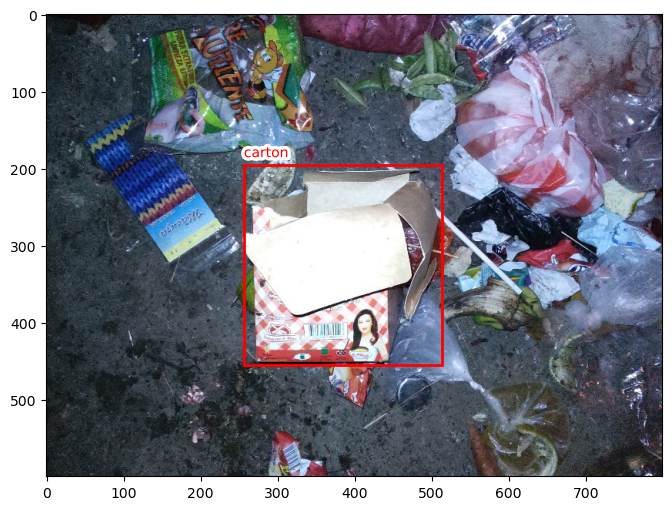

In [17]:
ix = random.randint(0,999)
image, anns = get_sample(ix, labels);
plot_anns(image, anns)